In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'

In [3]:
df = pd.read_csv(url, skiprows=lambda num: num < 34 or num == 35, sep='\t')

/tmp/ipykernel_42/879812612.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=lambda num: num < 34 or num == 35, sep='\t')


In [4]:
def tweak_river(df_):
    return (df_
           .assign(datetime=pd.to_datetime(df_.datetime))
           .rename(columns={'144166_00060': 'cfs',
                           '144167_00065':'gage_height'})
           .set_index('datetime')
           )

In [5]:
dd = tweak_river(df)

In [6]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00,USGS,9333500,MDT,9.20,P,6.15,P


In [7]:
dd.tz_cd

datetime
2001-05-07 01:00:00    MDT
2001-05-07 01:15:00    MDT
2001-05-07 01:30:00    MDT
2001-05-07 01:45:00    MDT
2001-05-07 02:00:00    MDT
                      ... 
2020-09-28 08:30:00    MDT
2020-09-28 08:45:00    MDT
2020-09-28 09:00:00    MDT
2020-09-28 09:15:00    MDT
2020-09-28 09:30:00    MDT
Name: tz_cd, Length: 539305, dtype: object

In [8]:
def tweak_river(df_):
    return(df_
          .assign(datetime=lambda df_:
                 pd.to_datetime(df_.datetime + " " +
                               df_.tz_cd.str.replace('MST', '-0700')
                               .str.replace('MDT', '-0600'),
                               format='%Y-%m-%d %H:%M %z', utc=True))
          .rename(columns={'144166_00060':'cfs',
                          '144167_00065':'gage_height'})
          .set_index('datetime')
          )

In [9]:
def to_america_denver_time(df_, time_col, tz_col):
    return(df_
          .assign(**{tz_col: df_[tz_col].replace('MDT', 'MST7MDT')})
          .groupby(tz_col)
          [time_col]
          .transform(lambda s: pd.to_datetime(s)
                    .dt.tz_localize(s.name, ambiguous=True)
                    .dt.tz_convert('America/Denver'))
          )

In [10]:
def tweak_river(df_):
    return (df_
           .assign(datetime=to_america_denver_time(df_, 'datetime', 'tz_cd'))
           .rename(columns={'144166_00060':'cfs',
                          '144167_00065':'gage_height'})
           .set_index('datetime')
           )

In [11]:
dd = tweak_river(df)

In [12]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00-06:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P


<Axes: xlabel='datetime'>

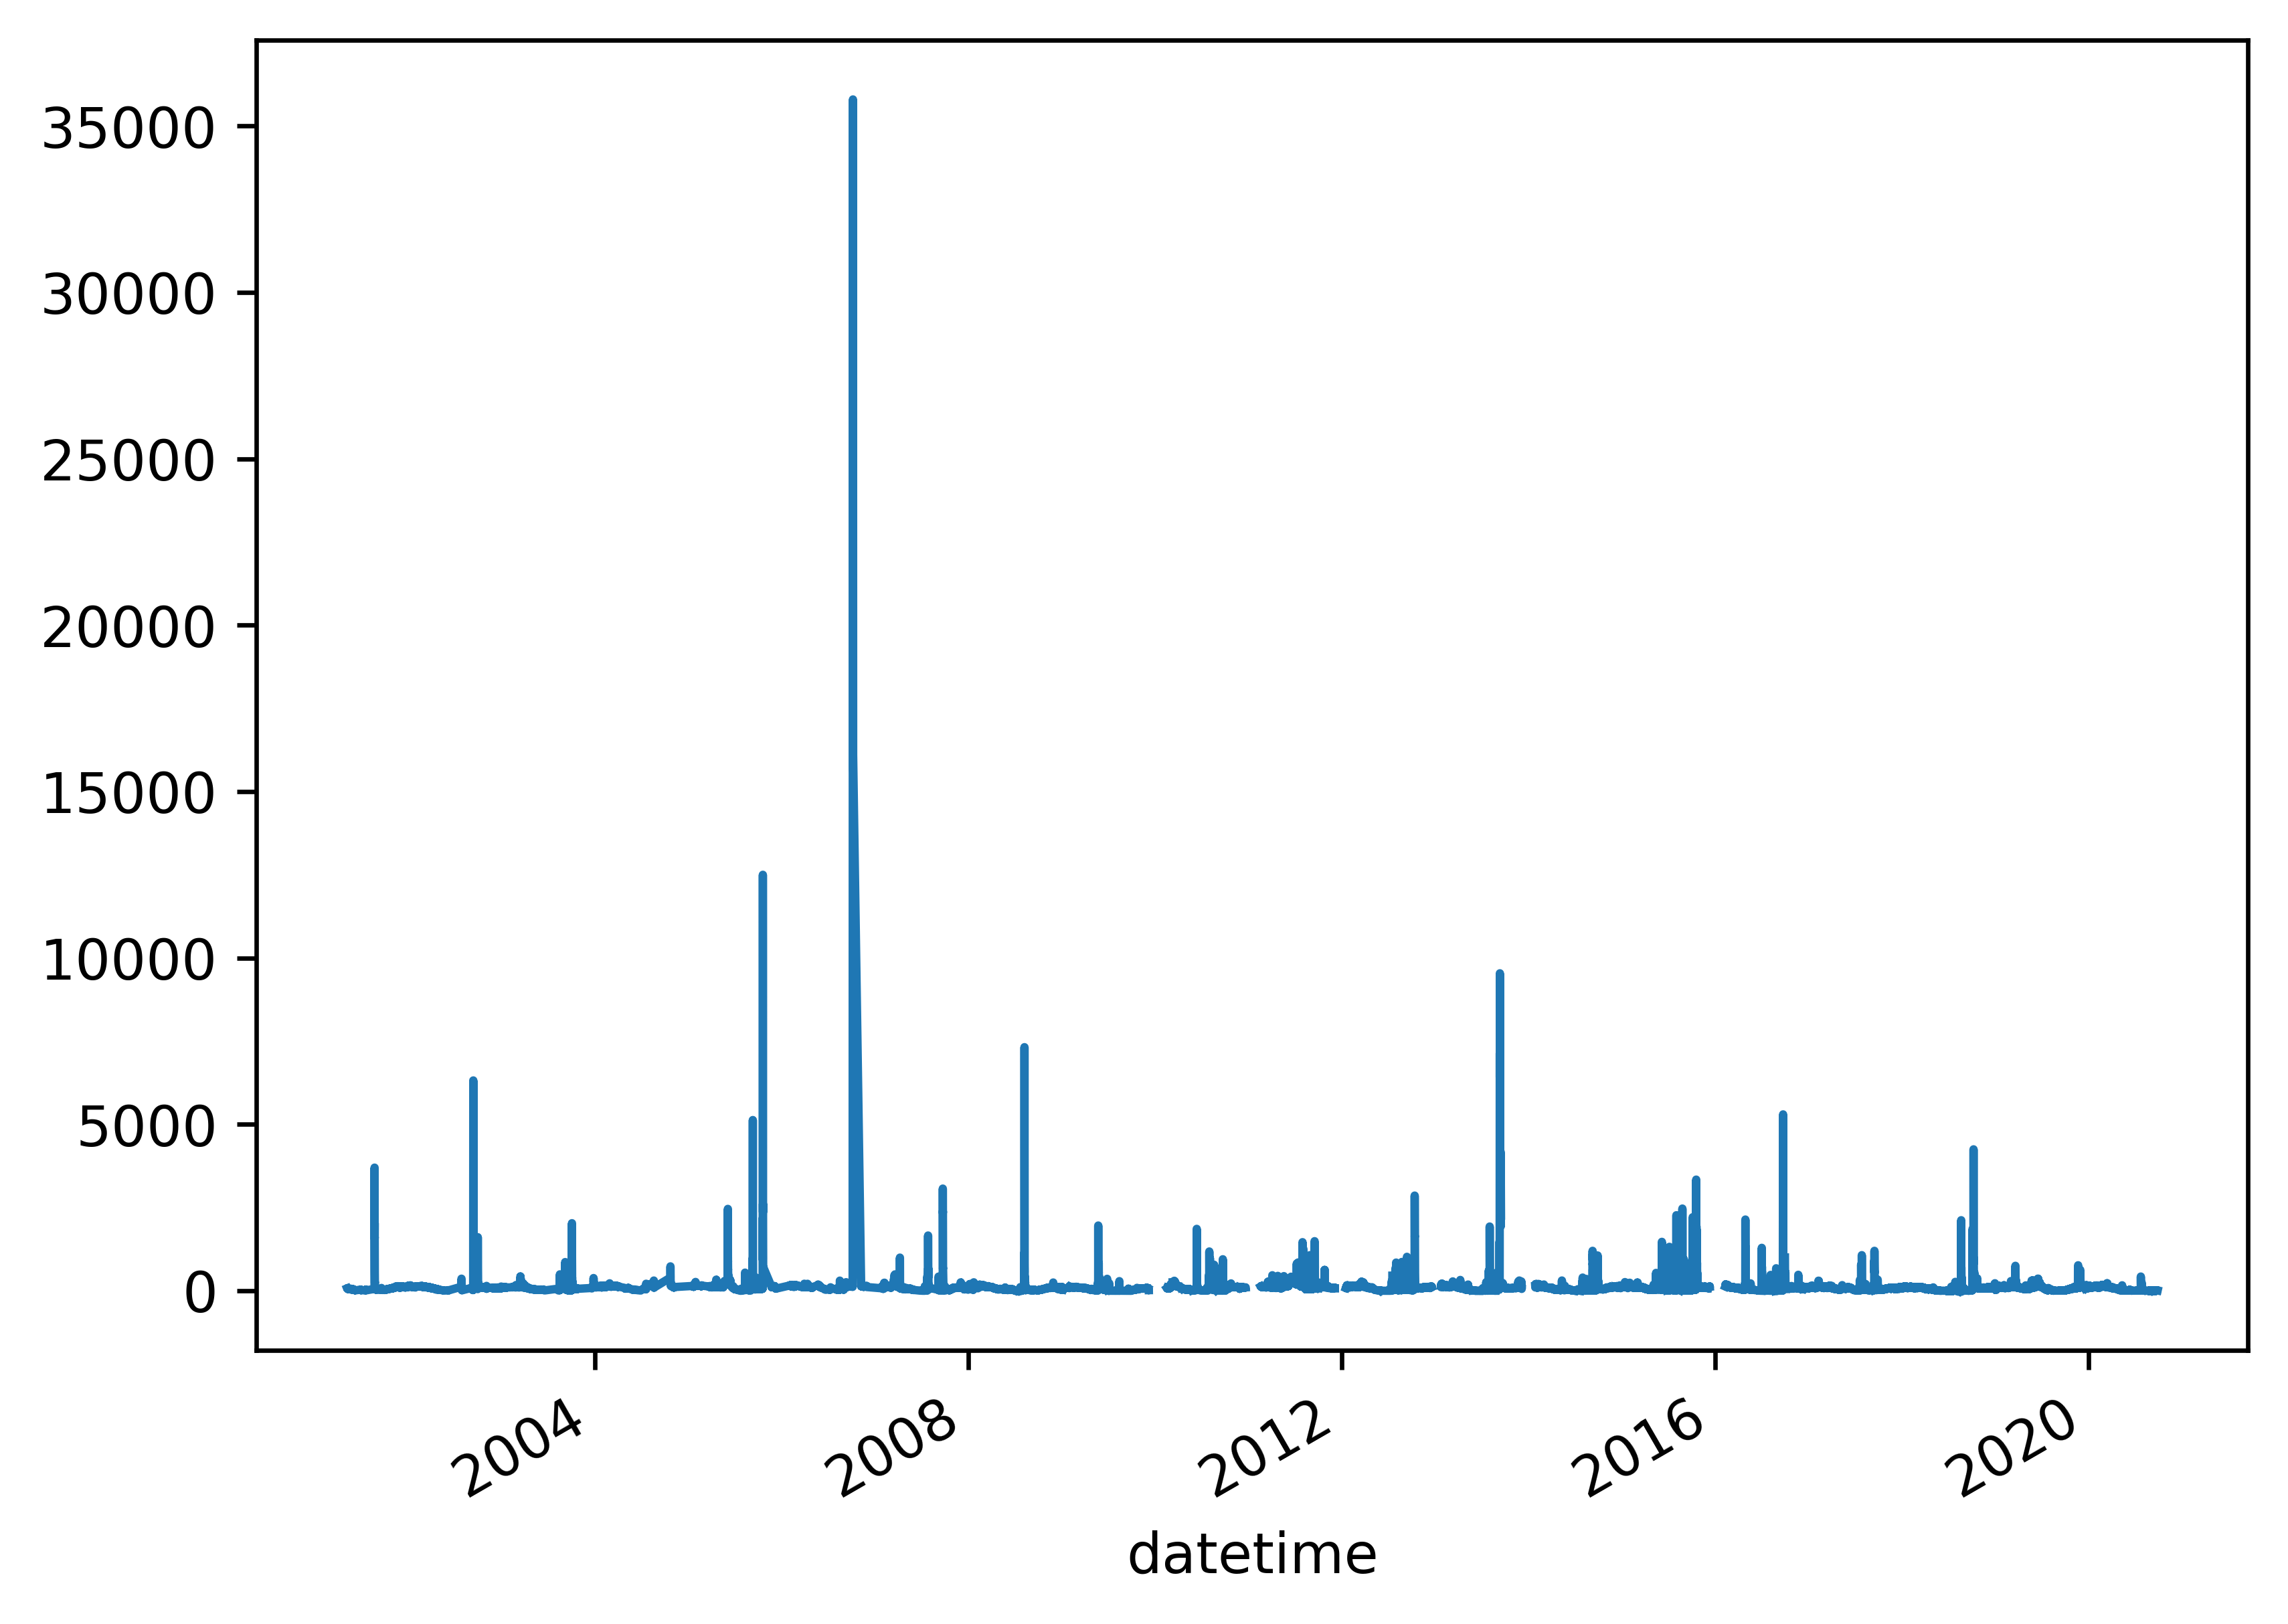

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=600)
dd.cfs.plot()

In [14]:
dd.cfs.describe()

count    493124.000000
mean        104.460537
std         477.341329
min           0.000000
25%          34.700000
50%          81.000000
75%         115.000000
max       35800.000000
Name: cfs, dtype: float64

In [15]:
(dd
    .cfs
    .loc['2018':]
)

datetime
2018-01-01 00:00:00-07:00    92.80
2018-01-01 00:15:00-07:00    88.30
2018-01-01 00:30:00-07:00    90.50
2018-01-01 00:45:00-07:00    90.50
2018-01-01 01:00:00-07:00    94.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 95886, dtype: float64

In [16]:
(dd
    .cfs
    .loc['2018/3':'2019/5']
)

datetime
2018-03-01 00:00:00-07:00    104.0
2018-03-01 00:15:00-07:00    107.0
2018-03-01 00:30:00-07:00    107.0
2018-03-01 00:45:00-07:00    105.0
2018-03-01 01:00:00-07:00    103.0
                             ...  
2019-05-31 22:45:00-06:00    121.0
2019-05-31 23:00:00-06:00    123.0
2019-05-31 23:15:00-06:00    123.0
2019-05-31 23:30:00-06:00    125.0
2019-05-31 23:45:00-06:00    123.0
Name: cfs, Length: 43862, dtype: float64

<Axes: xlabel='datetime'>

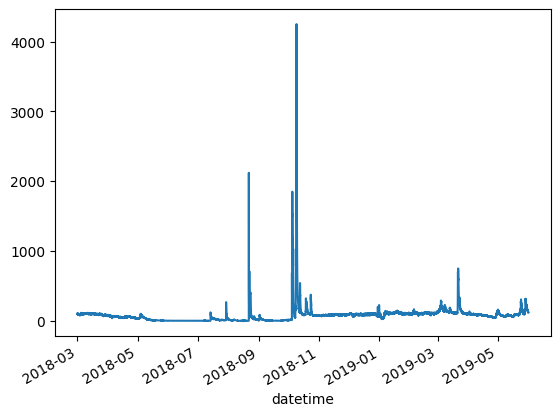

In [17]:
(dd
    .cfs
    .loc['2018/3':'2019/5']
    .plot()
)

<Axes: xlabel='datetime'>

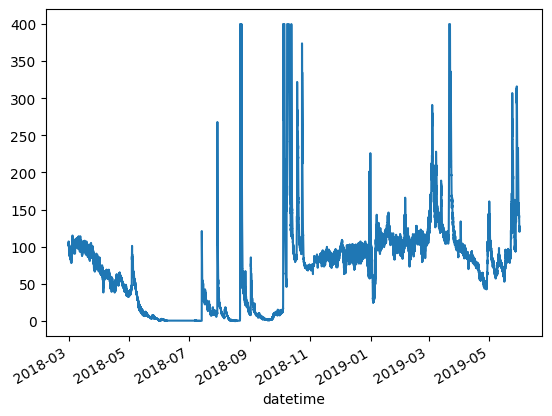

In [18]:
(dd
    .cfs
    .loc['2018/3':'2019/5']
    .clip(upper=400)
    .plot()
)

In [19]:
dd2018 = (dd
         .cfs
         .loc['2018/3':'2019/5']
         .clip(upper=400)
         )

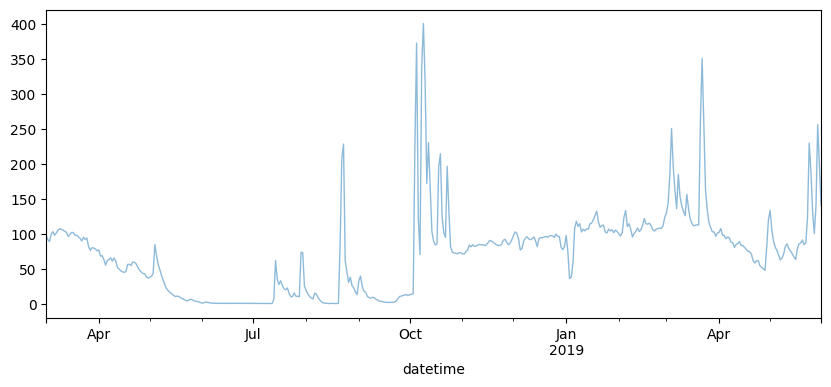

In [20]:
ax = (dd2018
     .resample('D')
     .mean()
     .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily')
     )

In [21]:
ax = (dd2018
     .resample('D')
     .mean()
     .rolling(7)
     .mean()
     .plot(figsize=(10,4), ax=ax, label='7-day Rolling')
     )


In [22]:
ax.legend()
ax.set_title('Dirty Devil Flow 2018 (cfs)')

Text(0.5, 1.0, 'Dirty Devil Flow 2018 (cfs)')

In [23]:
(dd
    [['cfs']]
    .loc['2018/3':'2019/5']
    .query('cfs.isna()')
)

,cfs
datetime,
2018-07-07 13:15:00-06:00,NaN
2018-07-07 13:30:00-06:00,NaN
2018-07-07 13:45:00-06:00,NaN
2018-07-07 14:00:00-06:00,NaN
2018-07-07 14:15:00-06:00,NaN
...,...
2018-08-18 08:15:00-06:00,NaN
2018-08-18 08:30:00-06:00,NaN
2018-08-18 08:45:00-06:00,NaN


<Axes: xlabel='datetime'>

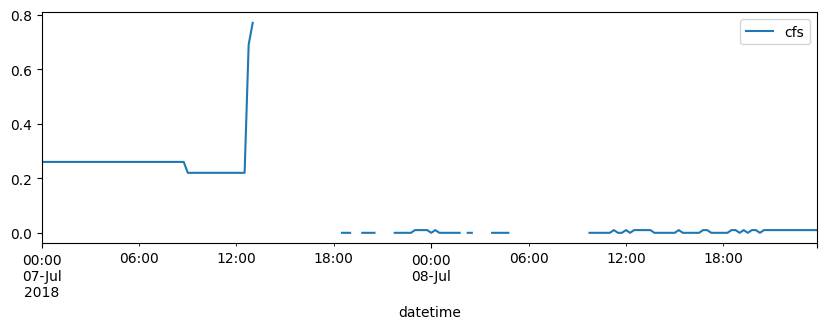

In [24]:
(dd
    [['cfs']]
    .loc['2018/7/7':'2018/7/8']
    .plot(figsize=(10,3))
)

<Axes: xlabel='datetime'>

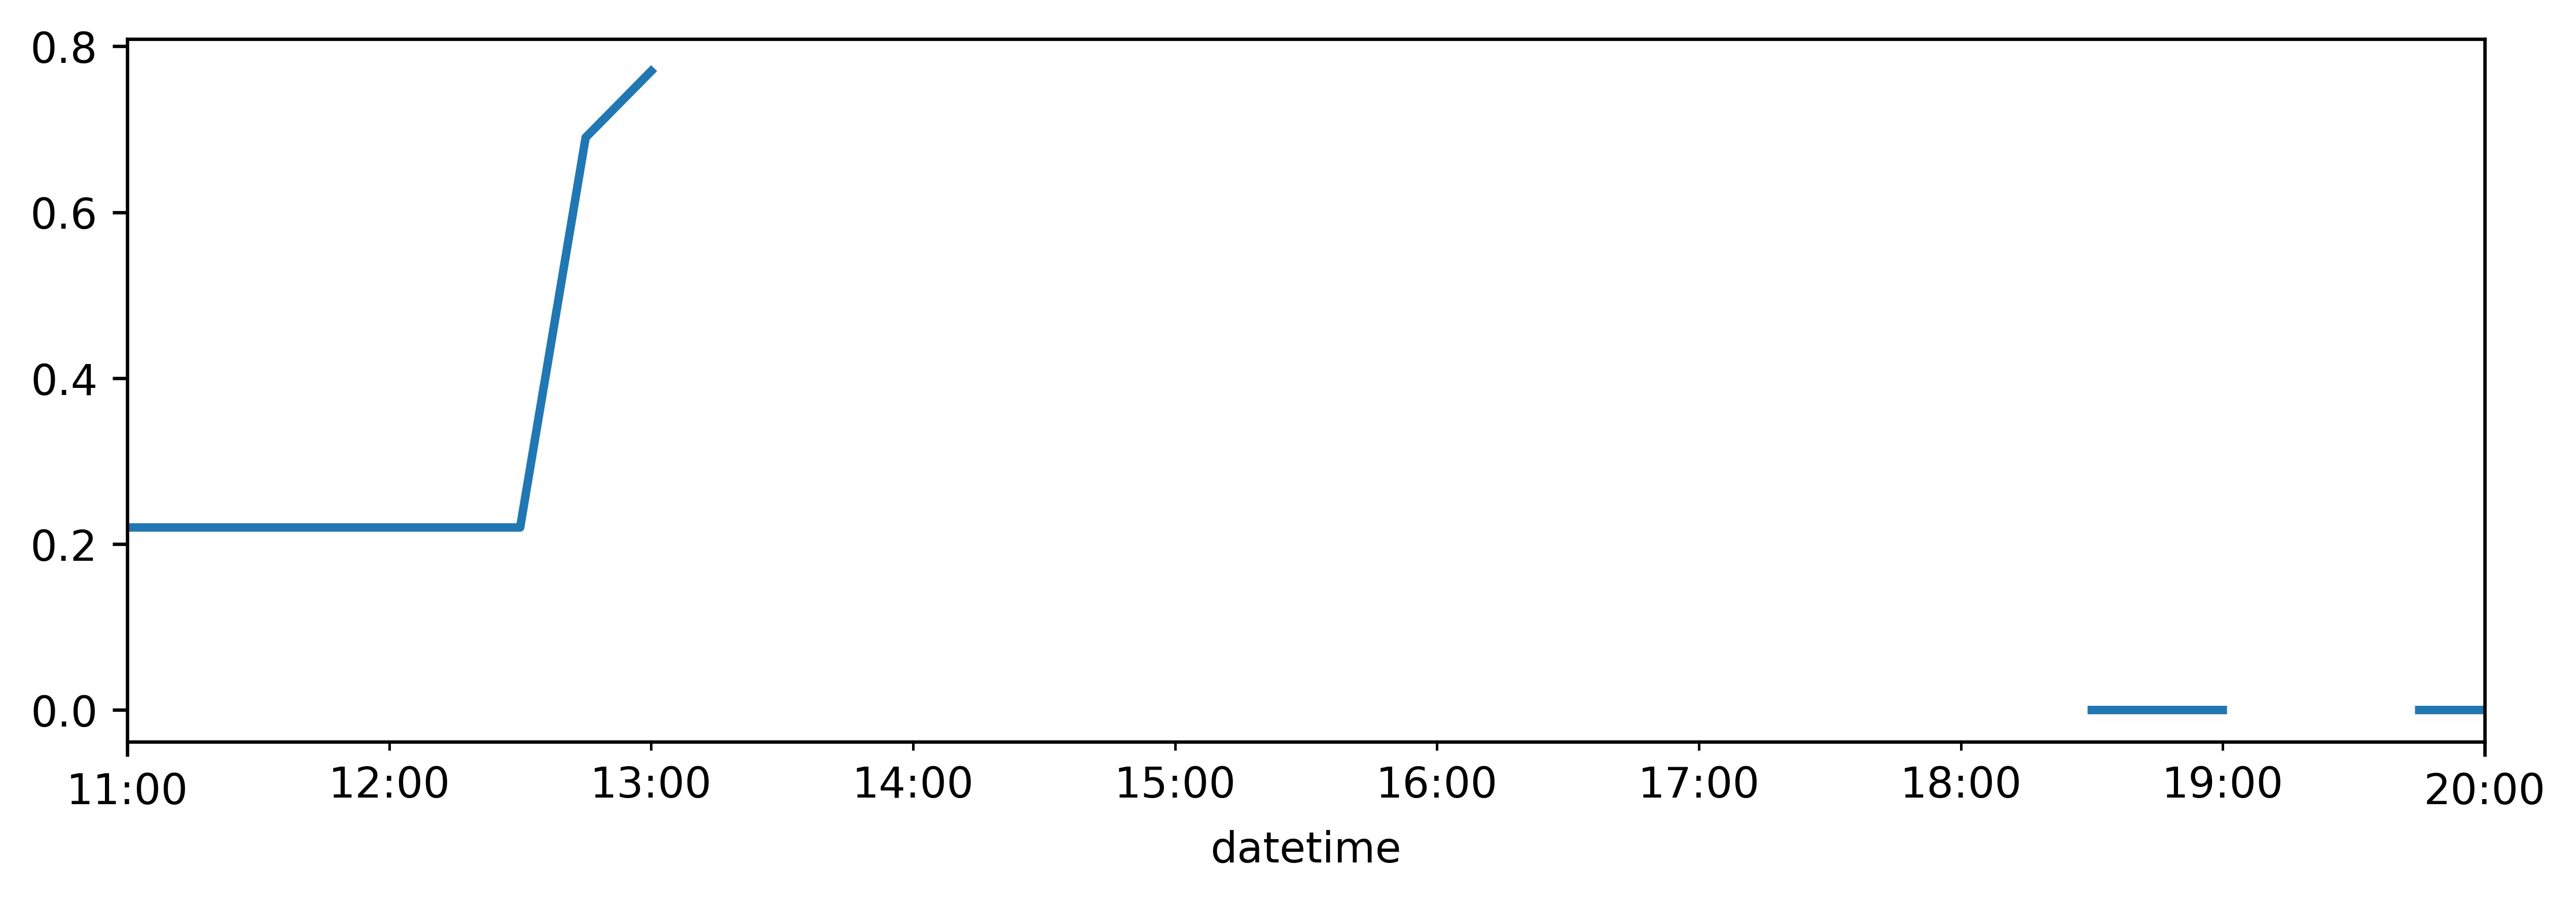

In [25]:
fig, ax = plt.subplots(dpi=600, figsize=(10,3))
dd_july = (dd
          ['cfs']
          .loc['2018/7/7 11:00':'2018/7/7 20:00']
          )
dd_july.plot(ax=ax, label='original', linewidth=2)

In [26]:
(dd_july
    .bfill()
    .add(.05)
    .plot(label='bfill', ax=ax, linewidth=.5)
)

<Axes: xlabel='datetime'>

In [27]:
(dd_july
    .interpolate(method='polynomial', order=3)
    .add(.15)
    .plot(label='interpolate poly (order 3)', ax=ax, linewidth=.5)
)

<Axes: xlabel='datetime'>

In [28]:
(dd_july
    .interpolate()
    .add(.2)
    .plot(label='interpolate default', ax=ax, linewidth=.5)
)

<Axes: xlabel='datetime'>

In [29]:
(dd_july
    .interpolate(method='nearest')
    .add(.25)
    .plot(label='interpolate nearest', ax=ax, linewidth=.5)
)

<Axes: xlabel='datetime'>

In [30]:
(dd_july
    .fillna(1)
    .add(.3)
    .plot(label='fillna 1', ax=ax, linewidth=.5)
)

<Axes: xlabel='datetime'>

In [31]:
ax.legend()

In [32]:
ax.set_title('Missing Values Demo')

Text(0.5, 1.0, 'Missing Values Demo')

In [33]:
(dd
    .groupby(dd.index.month)
    .cfs
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,26011.0,117.268802,29.000354,24.30,101.00,114.0,132.0,265.0
2,41309.0,125.890293,24.280297,56.00,109.00,125.0,141.0,303.0
3,51807.0,127.037609,48.885942,60.30,100.00,116.0,136.0,750.0
4,50669.0,82.786214,74.133528,20.50,52.50,70.0,97.8,2140.0
5,49507.0,63.007851,68.791835,0.31,27.20,43.9,78.5,1960.0
6,41379.0,74.327241,139.857378,0.02,8.93,32.0,82.5,2460.0
7,37089.0,62.775011,115.285805,0.00,4.25,17.4,68.2,1660.0
8,37584.0,74.676246,247.800553,0.00,6.30,25.6,59.1,7320.0
9,42272.0,128.309332,546.921269,0.00,7.55,20.0,55.9,9540.0


<Axes: xlabel='datetime'>

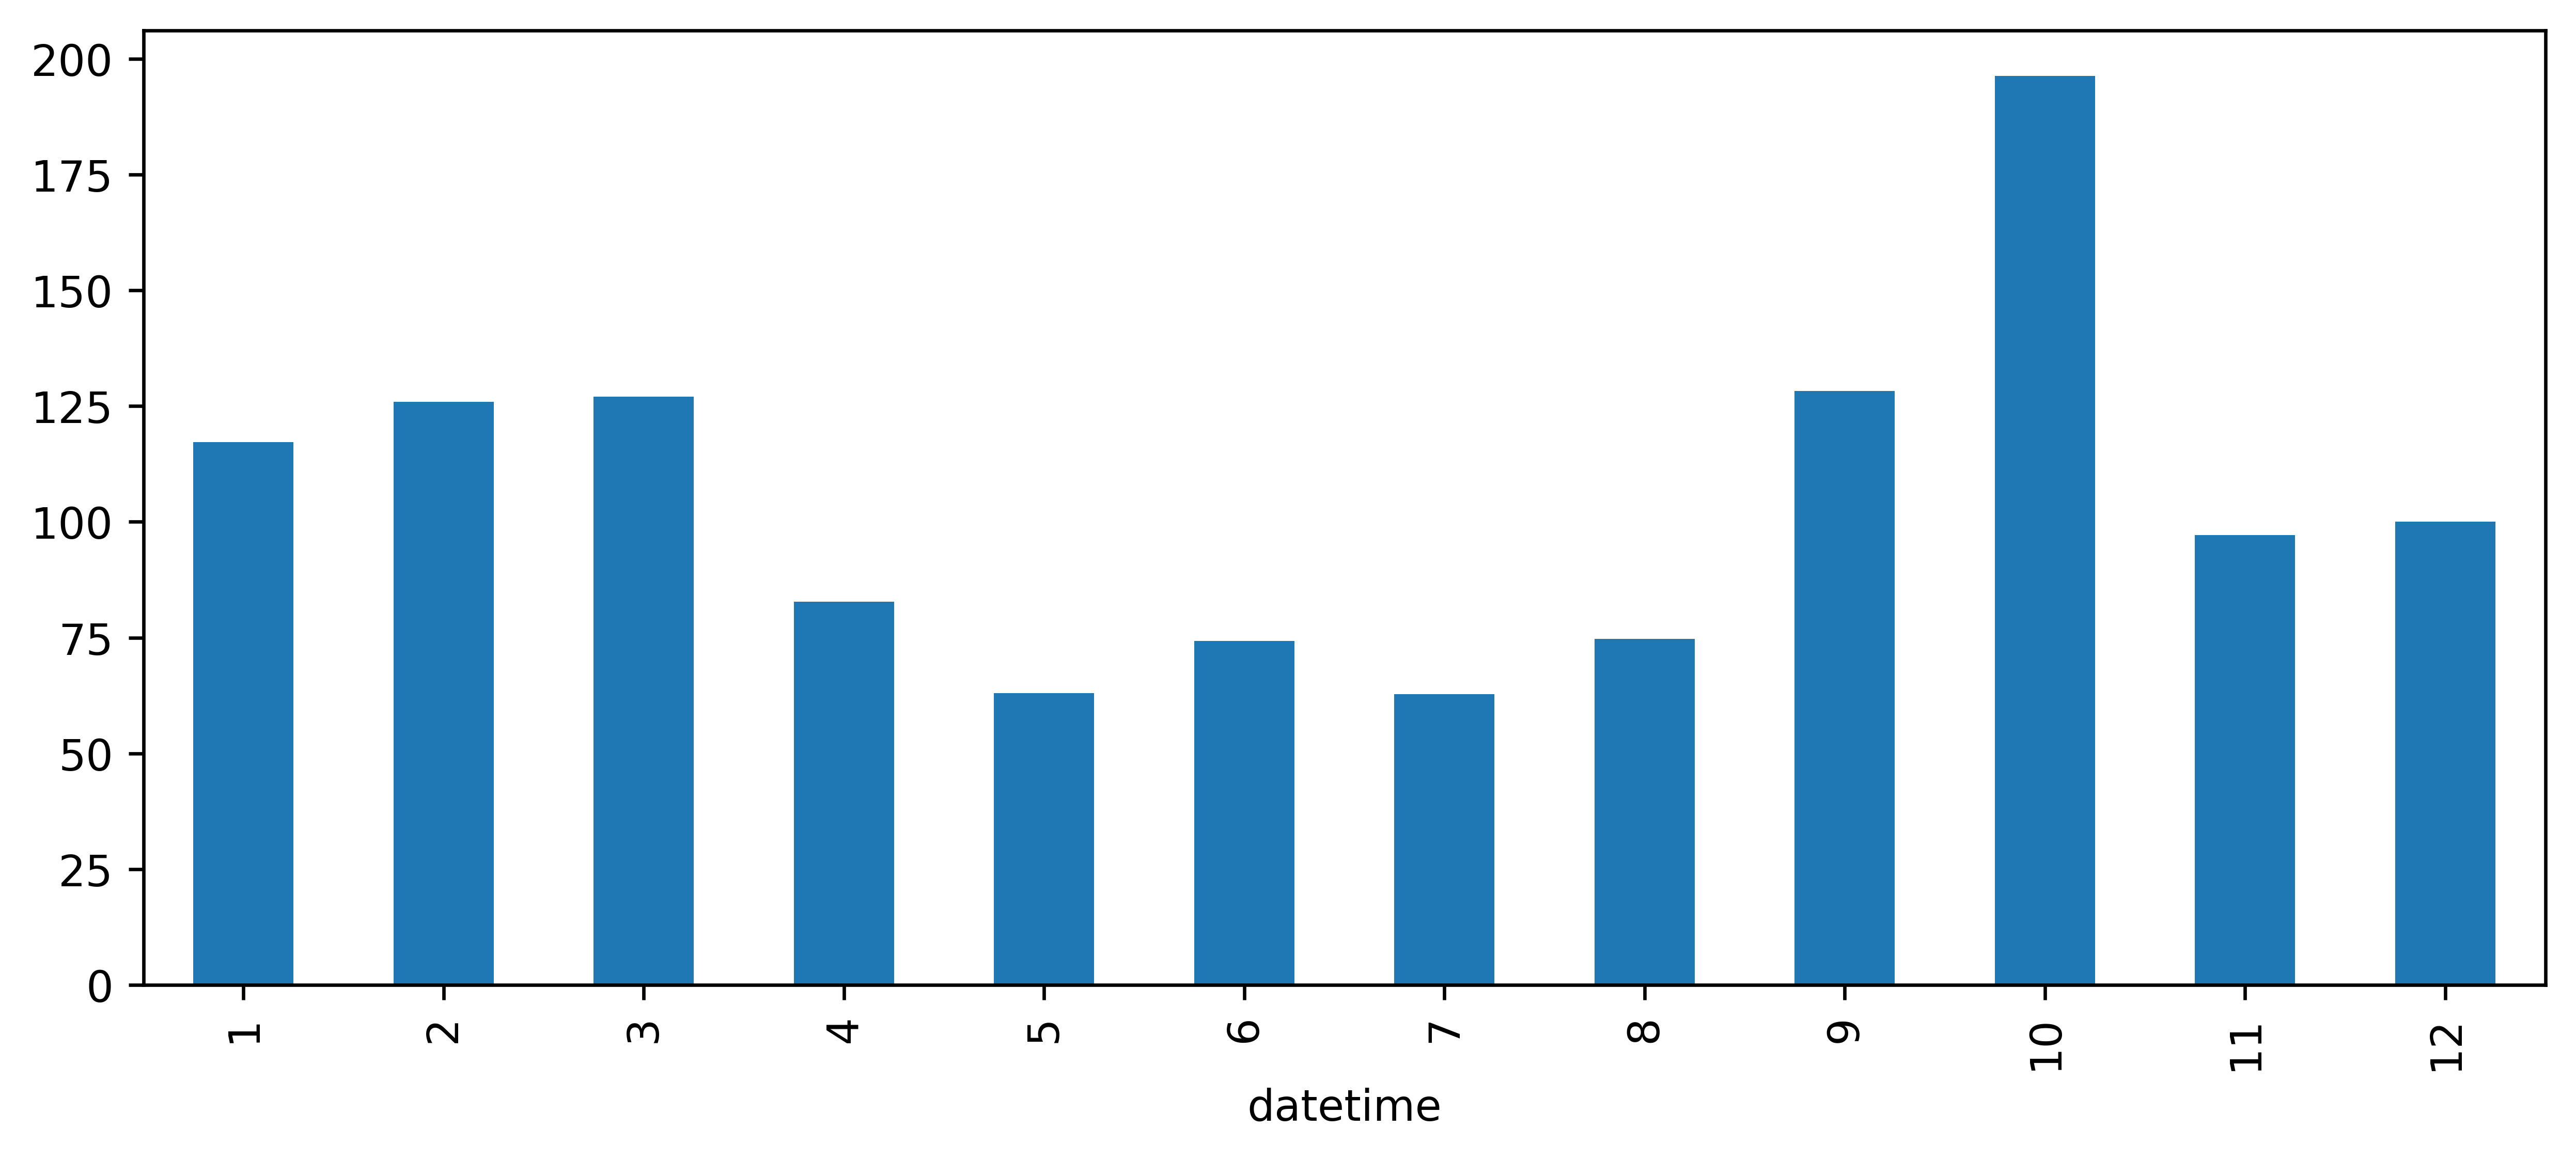

In [34]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(dd
    .groupby(dd.index.month)
    ['cfs']
    .describe()
    ['mean']
    .plot.bar(ax=ax)
)

<Axes: xlabel='datetime'>

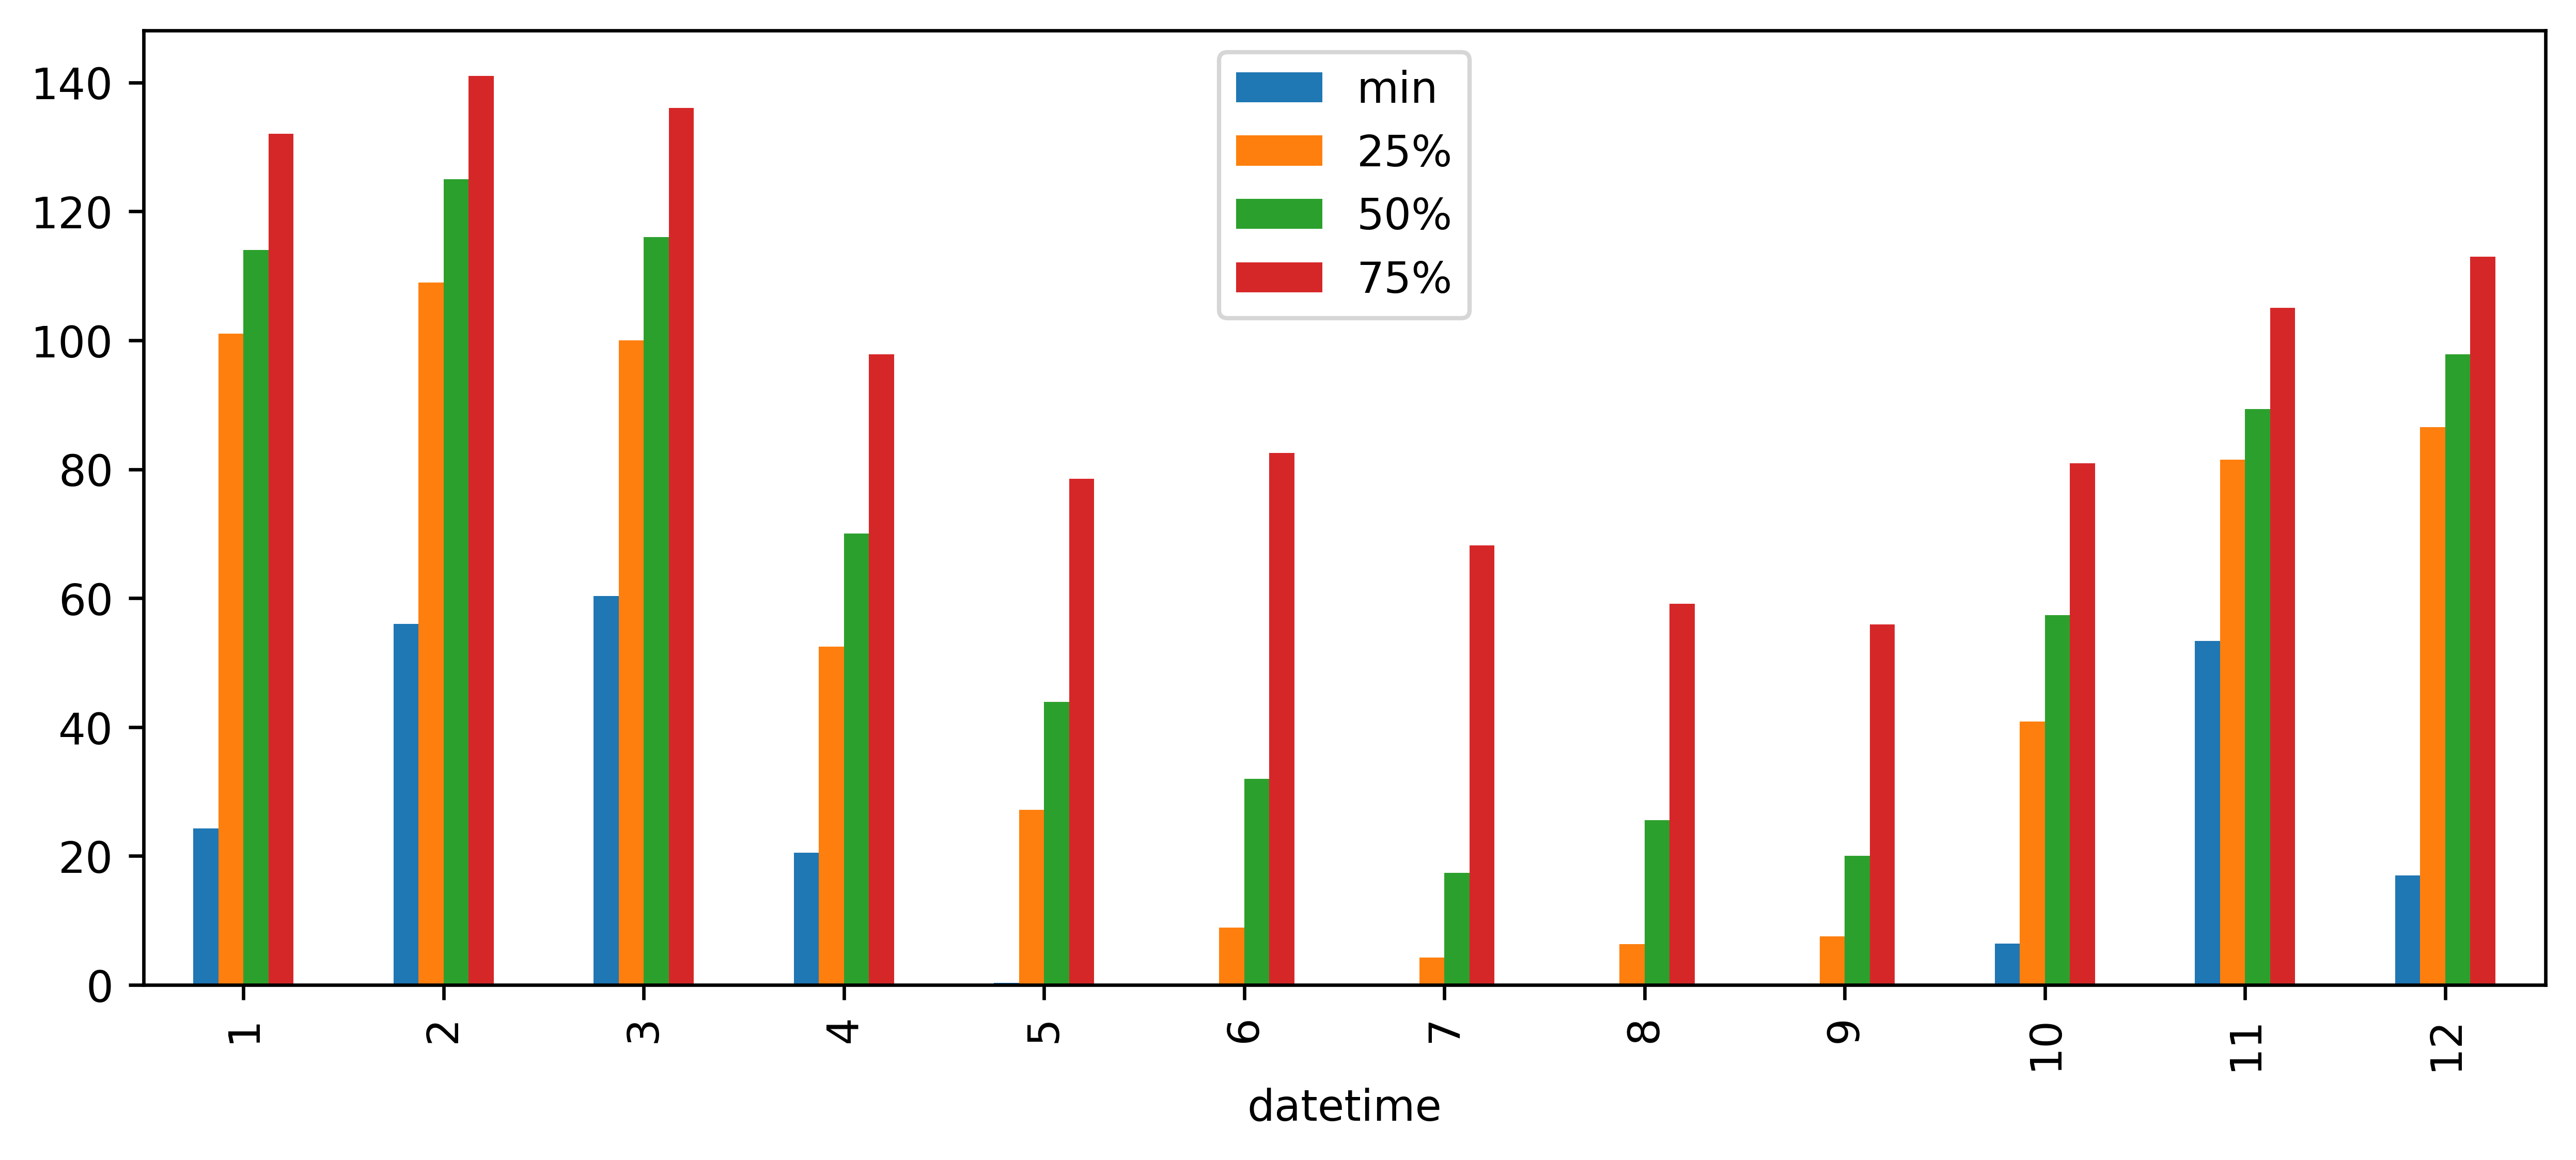

In [35]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(dd
    .groupby(dd.index.month)
    ['cfs']
    .describe()
    .loc[:, 'min':'75%']
    .plot.bar(ax=ax)
)

<Axes: xlabel='Month', ylabel='cfs'>

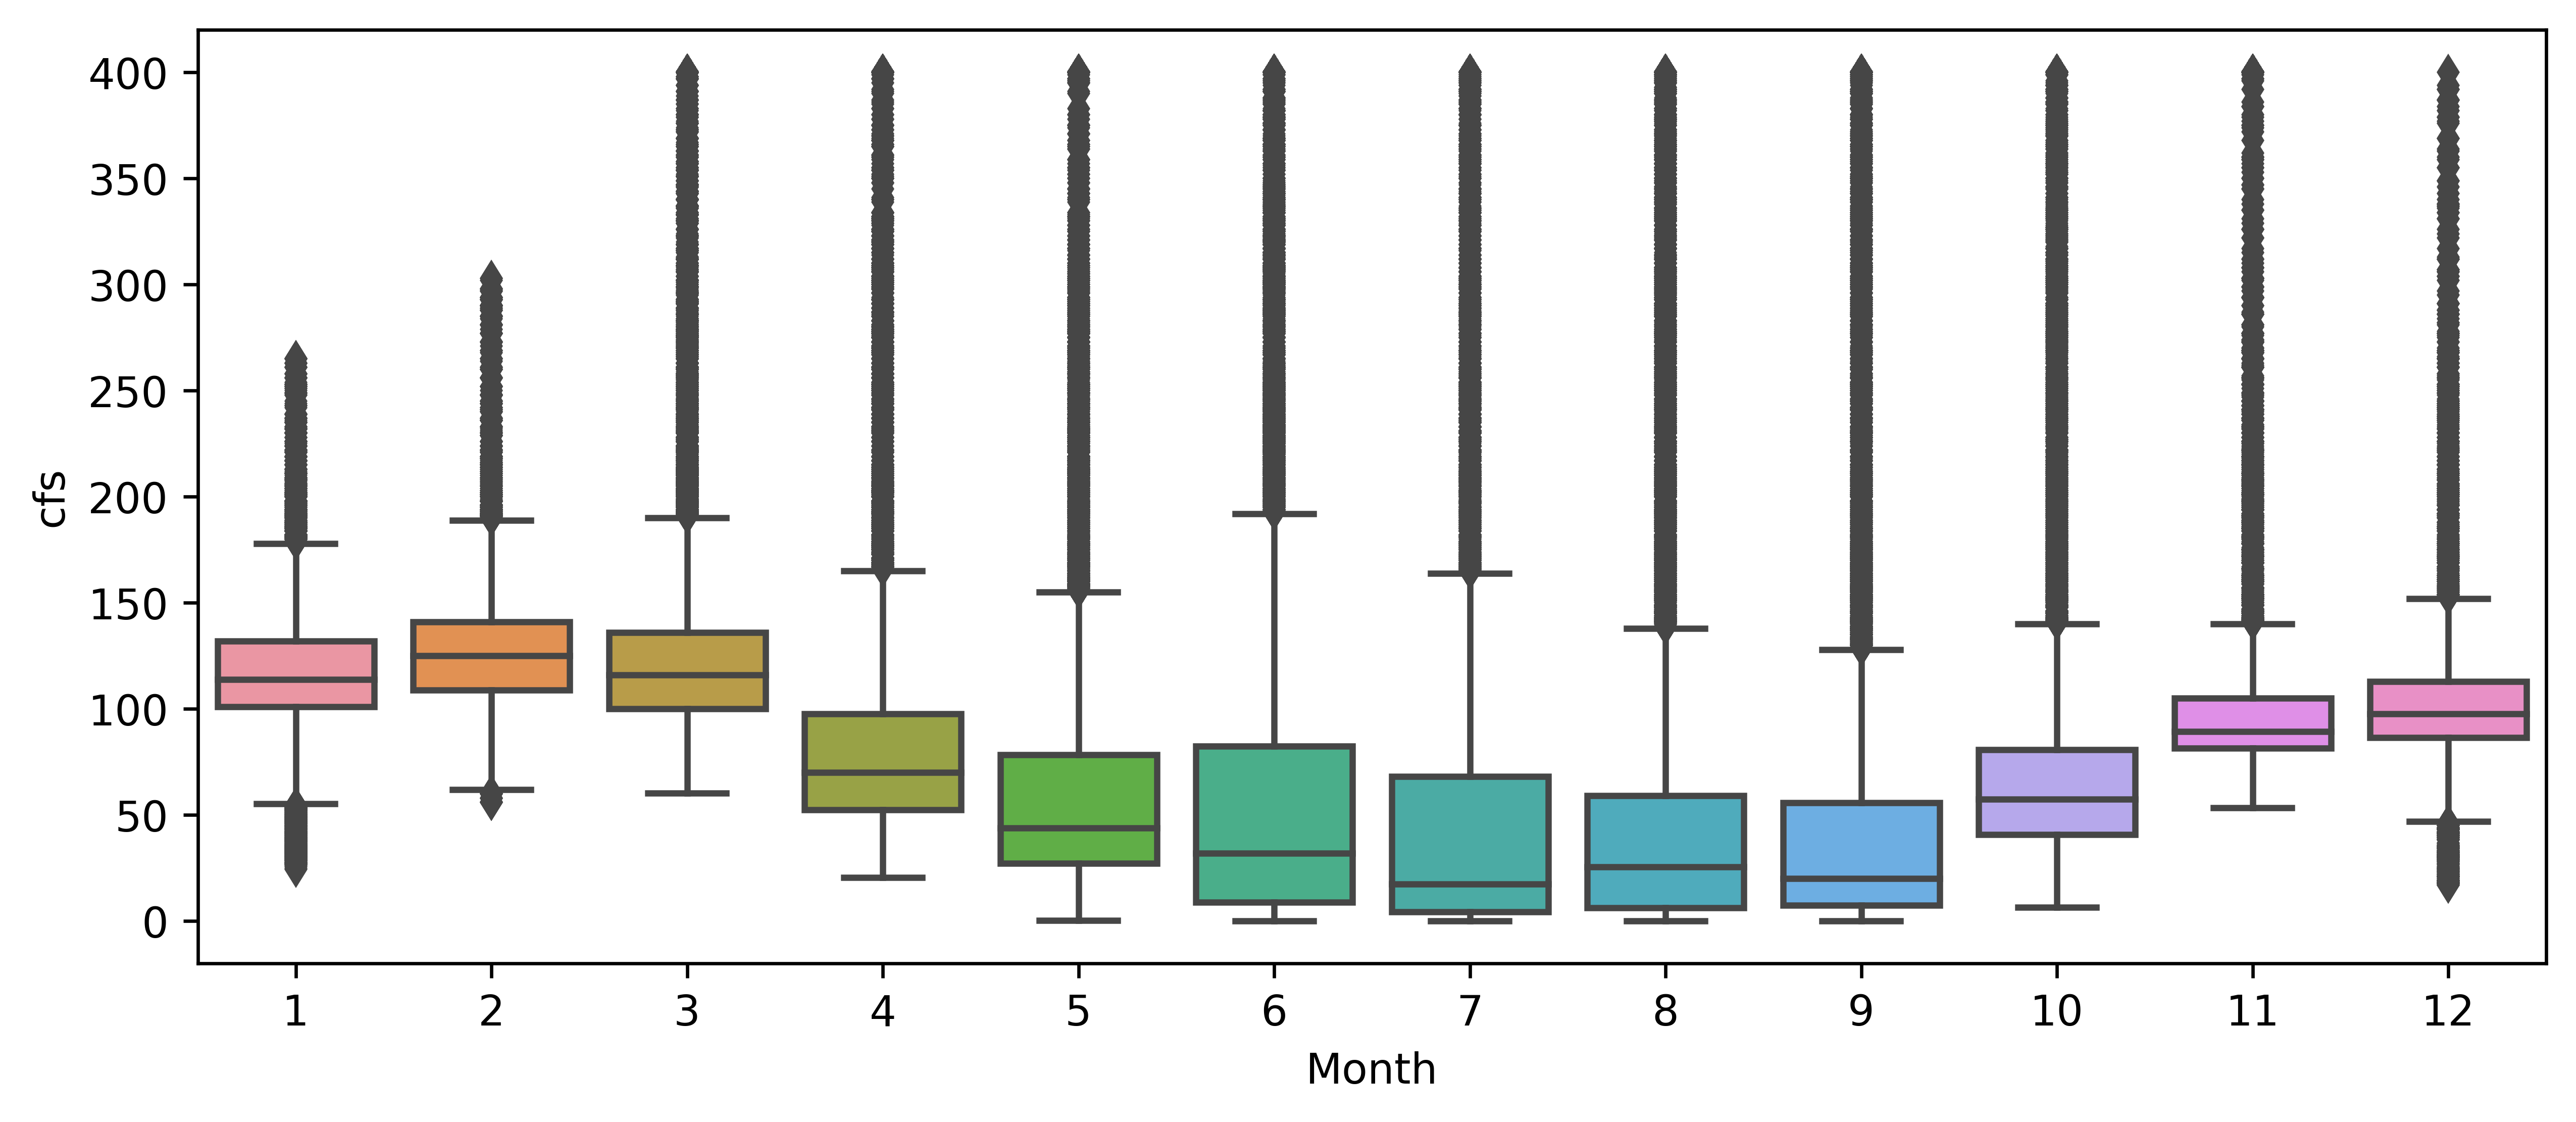

In [36]:
import seaborn as sns
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
sns.boxplot(data=dd.assign(cfs=dd.cfs.clip(upper=400)),
            x=dd.index.month.rename('Month'), y='cfs', ax=ax)

In [37]:
dd.cfs

datetime
2001-05-07 01:00:00-06:00    71.00
2001-05-07 01:15:00-06:00    71.00
2001-05-07 01:30:00-06:00    71.00
2001-05-07 01:45:00-06:00    70.00
2001-05-07 02:00:00-06:00    70.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 539305, dtype: float64

In [38]:
(dd
    .resample('D')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [39]:
(dd
    .resample('2D')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [40]:
(dd
    .resample('3D2H10min')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [41]:
(dd
    .resample('Q')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [42]:
(dd
    .resample('Q-JAN')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [44]:
(dd
    .resample('2min')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [45]:
(dd
    .resample('2min')
    .median()
    .interpolate()
)

TypeError: could not convert string to float: 'USGS'

In [46]:
(dd
    .resample('Q-JAN')
    .median()
)

TypeError: could not convert string to float: 'USGS'

In [47]:
(dd
    .reset_index()
    .groupby(pd.Grouper(key='datetime', freq='Q-JAN'))
    .median()
)

TypeError: could not convert string to float: 'USGS'